In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '3b026604-bae8-41fc-8ccc-236fedb3477b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-02-11T02:05:18.940Z', 'error_code': 0, 'error_message': None, 'elapsed': 37, 'credit_count': 1, 'notice': "You have used 165% of your plan's daily credit limit.", 'total_count': 8936}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9976, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capita

In [6]:
type(data)

dict

In [12]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.928722e+07,1.928722e+07,NaN,1,NaN,NaN,None,2023-02-11T02:03:00.000Z,21659.730838,2.659381e+10,-18.8277,-0.068085,-1.153054,-7.447896,18.779318,26.303340,28.368236,4.177560e+11,41.4732,4.548543e+11,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
1,1027,Ethereum,ETH,ethereum,6446,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-11T02:03:00.000Z,1513.809800,8.208260e+09,-23.7354,-0.172715,-2.435860,-8.754747,7.985603,19.422166,19.788448,1.852508e+11,18.3908,1.852508e+11,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
2,825,Tether,USDT,tether,47381,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.831944e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-11T02:03:00.000Z,1.000152,3.629171e+10,-25.2307,-0.004597,-0.003400,0.003200,0.014668,0.003088,0.155096,6.832986e+10,6.7807,7.315292e+10,None,2023-02-11T02:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-11 02:05:20.017405
3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578994e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-11T02:03:00.000Z,306.282064,4.749941e+08,-40.3252,-0.403744,-0.418675,-7.739427,7.218640,12.192540,8.545347,4.836174e+10,4.8005,6.125641e+10,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
4,3408,USD Coin,USDC,usd-coin,10013,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.136404e+10,4.136404e+10,NaN,5,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.999867,3.637862e+09,-19.2716,-0.010851,-0.032493,0.011480,-0.019362,-0.017479,-0.066493,4.135855e+10,4.1059,4.135855e+10,None,2023-02-11T02:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-11 02:05:20.017405
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.381263,8.262239e+08,-45.5353,-0.135223,-0.680215,-6.964130,2.514257,-0.593385,4.506481,1.936780e+10,1.9225,3.812629e+10,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
6,4687,Binance USD,BUSD,binance-usd,6180,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.614891e+10,1.614891e+10,NaN,7,NaN,NaN,None,2023-02-11T02:03:00.000Z,1.000113,1.037035e+10,-21.8673,0.000709,0.006057,0.014967,-0.047150,0.006693,-0.137906,1.615073e+10,1.6034,1.615073e+10,None,2023-02-11T02:03:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-11 02:05:20.017405
7,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.462218e+10,3.546743e+10,NaN,8,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.358528,3.417828e+08,-31.3603,-0.134000,-0.873089,-10.620533,10.284212,17.290394,5.124957,1.241303e+10,1.2318,1.613377e+10,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
8,74,Dogecoin,DOGE,dogecoin,644,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,N

In [9]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '3b026604-bae8-41fc-8ccc-236fedb3477b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [10]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60) # sleep for one minute
exit()

{'status': {'timestamp': '2023-02-11T02:06:27.633Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': "You have used 165% of your plan's daily credit limit.", 'total_count': 8936}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9976, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capita

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_928\2380137787.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-02-11T02:07:28.592Z', 'error_code': 0, 'error_message': None, 'elapsed': 32, 'credit_count': 1, 'notice': "You have used 166% of your plan's daily credit limit.", 'total_count': 8936}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9976, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capita

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_928\2380137787.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


{'status': {'timestamp': '2023-02-11T02:08:29.427Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': "You have used 166% of your plan's daily credit limit.", 'total_count': 8936}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9976, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capita

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\HP\AppData\Local\Temp\ipykernel_928\2380137787.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


KeyboardInterrupt: 

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.928722e+07,1.928722e+07,NaN,1,NaN,NaN,None,2023-02-11T02:03:00.000Z,21659.730838,2.659381e+10,-18.8277,-0.068085,-1.153054,-7.447896,18.779318,26.303340,28.368236,4.177560e+11,41.4732,4.548543e+11,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
1,1027,Ethereum,ETH,ethereum,6446,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-11T02:03:00.000Z,1513.809800,8.208260e+09,-23.7354,-0.172715,-2.435860,-8.754747,7.985603,19.422166,19.788448,1.852508e+11,18.3908,1.852508e+11,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
2,825,Tether,USDT,tether,47381,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.831944e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-11T02:03:00.000Z,1.000152,3.629171e+10,-25.2307,-0.004597,-0.003400,0.003200,0.014668,0.003088,0.155096,6.832986e+10,6.7807,7.315292e+10,None,2023-02-11T02:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-11 02:05:20.017405
3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.578994e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-11T02:03:00.000Z,306.282064,4.749941e+08,-40.3252,-0.403744,-0.418675,-7.739427,7.218640,12.192540,8.545347,4.836174e+10,4.8005,6.125641e+10,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
4,3408,USD Coin,USDC,usd-coin,10013,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.136404e+10,4.136404e+10,NaN,5,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.999867,3.637862e+09,-19.2716,-0.010851,-0.032493,0.011480,-0.019362,-0.017479,-0.066493,4.135855e+10,4.1059,4.135855e+10,None,2023-02-11T02:03:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-11 02:05:20.017405
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.079908e+10,9.998913e+10,NaN,6,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.381263,8.262239e+08,-45.5353,-0.135223,-0.680215,-6.964130,2.514257,-0.593385,4.506481,1.936780e+10,1.9225,3.812629e+10,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
6,4687,Binance USD,BUSD,binance-usd,6180,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.614891e+10,1.614891e+10,NaN,7,NaN,NaN,None,2023-02-11T02:03:00.000Z,1.000113,1.037035e+10,-21.8673,0.000709,0.006057,0.014967,-0.047150,0.006693,-0.137906,1.615073e+10,1.6034,1.615073e+10,None,2023-02-11T02:03:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2023-02-11 02:05:20.017405
7,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.462218e+10,3.546743e+10,NaN,8,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.358528,3.417828e+08,-31.3603,-0.134000,-0.873089,-10.620533,10.284212,17.290394,5.124957,1.241303e+10,1.2318,1.613377e+10,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
8,74,Dogecoin,DOGE,dogecoin,644,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,N

In [15]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [16]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9976,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19287218.00000,19287218.00000,NaN,1,NaN,NaN,None,2023-02-11T02:03:00.000Z,21659.73084,26593810436.77906,-18.82770,-0.06809,-1.15305,-7.44790,18.77932,26.30334,28.36824,417755950491.69971,41.47320,454854347595.67999,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
1,1027,Ethereum,ETH,ethereum,6446,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-11T02:03:00.000Z,1513.80980,8208259537.28555,-23.73540,-0.17272,-2.43586,-8.75475,7.98560,19.42217,19.78845,185250758003.02625,18.39080,185250758003.03000,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
2,825,Tether,USDT,tether,47381,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,68319442037.67854,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-11T02:03:00.000Z,1.00015,36291706980.39015,-25.23070,-0.00460,-0.00340,0.00320,0.01467,0.00309,0.15510,68329858341.62237,6.78070,73152917859.45000,None,2023-02-11T02:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-11 02:05:20.017405
3,1839,BNB,BNB,bnb,1185,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.00000,157899352.40681,159979963.59043,NaN,4,NaN,NaN,None,2023-02-11T02:03:00.000Z,306.28206,474994096.89999,-40.32520,-0.40374,-0.41868,-7.73943,7.21864,12.19254,8.54535,48361739619.52327,4.80050,61256412876.13000,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
4,3408,USD Coin,USDC,usd-coin,10013,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,41364037608.59705,41364037608.59705,NaN,5,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.99987,3637862034.35301,-19.27160,-0.01085,-0.03249,0.01148,-0.01936,-0.01748,-0.06649,41358552929.23282,4.10590,41358552929.23000,None,2023-02-11T02:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-11 02:05:20.017405
5,52,XRP,XRP,xrp,886,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50799084881.00000,99989130718.00000,NaN,6,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.38126,826223862.01135,-45.53530,-0.13522,-0.68021,-6.96413,2.51426,-0.59338,4.50648,19367804229.98561,1.92250,38126285690.69000,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-11 02:05:20.017405
6,4687,Binance USD,BUSD,binance-usd,6180,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,16148914845.97338,16148914845.97338,NaN,7,NaN,NaN,None,2023-02-11T02:03:00.000Z,1.00011,10370350708.14929,-21.86730,0.00071,0.00606,0.01497,-0.04715,0.00669,-0.13791,16150732259.88239,1.60340,16150732259.88000,None,2023-02-11T02:03:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2023-02-11 02:05:20.017405
7,2010,Cardano,ADA,cardano,649,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34622181461.66800,35467426506.41500,NaN,8,NaN,NaN,None,2023-02-11T02:03:00.000Z,0.35853,341782789.02023,-31.36030,-0.13400,-0.87309,-10.62053,10.28421,17.29039,5.12496,12413027354.17952,1.23180,16133767641.32000,None,2023-02-11T02:03:00.000Z,NaN,NaN,NaN,NaN,NaN,202

In [17]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.10092,-1.18006,-7.47485,18.73727,26.24111,28.29367
Ethereum,-0.16070,-2.43282,-8.74181,7.97932,19.40816,19.69807
Tether,-0.00276,-0.00573,0.00102,0.01278,0.00231,0.16087
BNB,-0.40895,-0.41546,-7.76295,7.22176,12.20659,8.50820
USD Coin,-0.01604,-0.03449,-0.00574,-0.03572,-0.02254,-0.06475
XRP,-0.09140,-0.69018,-6.95187,2.56223,-0.57715,4.42394
Binance USD,-0.00984,-0.00423,-0.00265,-0.04395,0.01812,-0.09609
Cardano,-0.12593,-0.88879,-10.60335,10.19380,17.28448,5.03556
Dogecoin,0.20932,-0.41769,-12.72760,3.11293,-9.50792,-8.50135


In [18]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.10092
             quote.USD.percent_change_24h    -1.18006
             quote.USD.percent_change_7d     -7.47485
             quote.USD.percent_change_30d    18.73727
             quote.USD.percent_change_60d    26.24111
             quote.USD.percent_change_90d    28.29367
Ethereum     quote.USD.percent_change_1h     -0.16070
             quote.USD.percent_change_24h    -2.43282
             quote.USD.percent_change_7d     -8.74181
             quote.USD.percent_change_30d     7.97932
             quote.USD.percent_change_60d    19.40816
             quote.USD.percent_change_90d    19.69807
Tether       quote.USD.percent_change_1h     -0.00276
             quote.USD.percent_change_24h    -0.00573
             quote.USD.percent_change_7d      0.00102
             quote.USD.percent_change_30d     0.01278
             quote.USD.percent_change_60d     0.00231
             quote.USD.percent_change_90

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.10092
            quote.USD.percent_change_24h  -1.18006
            quote.USD.percent_change_7d   -7.47485
            quote.USD.percent_change_30d  18.73727
            quote.USD.percent_change_60d  26.24111
            quote.USD.percent_change_90d  28.29367
Ethereum    quote.USD.percent_change_1h   -0.16070
            quote.USD.percent_change_24h  -2.43282
            quote.USD.percent_change_7d   -8.74181
            quote.USD.percent_change_30d   7.97932
            quote.USD.percent_change_60d  19.40816
            quote.USD.percent_change_90d  19.69807
Tether      quote.USD.percent_change_1h   -0.00276
            quote.USD.percent_change_24h  -0.00573
            quote.USD.percent_change_7d    0.00102
            quote.USD.percent_change_30d   0.01278
            quote.USD.percent_change_60d   0.00231
            quote.USD.percent_change_90d   0.16087
BNB         quote.USD.percent_change_1h   -0.40895
            quote.USD.percent_change_24h  -0.41546
            quote.USD.percent_change_7d   -7.76295
            quote.USD.percent_change_30d   7.22176
            quote.USD.percent_change_60d  12.20659
            quote.USD.percent_change_90d   8.50820
USD Coin    quote.USD.percent_change_1h   -0.01604
            quote.USD.percent_change_24h  -0.03449
            quote.USD.percent_change_7d   -0.00574
            quote.USD.percent_change_30d  -0.03572
            quote.USD.percent_change_60d  -0.02254
            quote.USD.percent_change_90d  -0.06475
XRP         quote.USD.percent_change_1h   -0.09140
            quote.USD.percent_change_24h  -0.69018
            quote.USD.percent_change_7d   -6.95187
            quote.USD.percent_change_30d   2.56223
            quote.USD.percent_change_60d  -0.57715
            quote.USD.percent_change_90d   4.42394
Binance USD quote.USD.percent_change_1h   -0.00984
            quote.USD.percent_change_24h  -0.00423
            quote.USD.percent_change_7d   -0.00265
            quote.USD.percent_change_30d  -0.04395
            quote.USD.percent_change_60d   0.01812
            quote.USD.percent_change_90d  -0.09609
Cardano     quote.USD.percent_change_1h   -0.12593
            quote.USD.percent_change_24h  -0.88879
            quote.USD.percent_change_7d  -10.60335
            quote.USD.percent_change_30d  10.19380
            quote.USD.percent_change_60d  17.28448
            quote.USD.percent_change_90d   5.03556
Dogecoin    quote.USD.percent_change_1h    0.20932
            quote.USD.percent_change_24h  -0.41769
            quote.USD.percent_change_7d  -12.72760
            quote.USD.percent_change_30d   3.11293
            quote.USD.percent_change_60d  -9.50792
            quote.USD.percent_change_90d  -8.50135
Polygon     quote.USD.percent_change_1h   -0.18313
            quote.USD.percent_change_24h  -3.25590
            quote.USD.percent_change_7d   -0.94847
            quote.USD.percent_change_30d  36.34227
            quote.USD.percent_change_60d  35.03228
            quote.USD.percent_change_90d  26.88115
Solana      quote.USD.percent_change_1h   -0.35870
            quote.USD.percent_change_24h  -2.40275
            quote.USD.percent_change_7d  -17.28116
            quote.USD.percent_change_30d  22.21358
            quote.USD.percent_change_60d  53.49731
            quote.USD.percent_change_90d  42.70532
Polkadot    quote.USD.percent_change_1h   -0.14985
            quote.USD.percent_change_24h  -1.46136
            quote.USD.percent_change_7d  -10.60904
            quote.USD.percent_change_30d  20.34794
            quote.USD.percent_change_60d  20.03506
            quote.USD.percent_change_90d   5.88331
Shiba Inu   quote.USD.percent_change_1h   -1.14587
            quote.USD.percent_change_24h   2.75623
            quote.USD.percent_change_7d   -8.71585
            quote.USD.percent_change_30d  35.88639
            quote.USD.percent_change_60d  44.24551
            quo

In [21]:
df5.count()

values    90
dtype: int64

In [25]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10092
1,Bitcoin,quote.USD.percent_change_24h,-1.18006
2,Bitcoin,quote.USD.percent_change_7d,-7.47485
3,Bitcoin,quote.USD.percent_change_30d,18.73727
4,Bitcoin,quote.USD.percent_change_60d,26.24111
5,Bitcoin,quote.USD.percent_change_90d,28.29367
6,Ethereum,quote.USD.percent_change_1h,-0.16070
7,Ethereum,quote.USD.percent_change_24h,-2.43282
8,Ethereum,quote.USD.percent_change_7d,-8.74181
9,Ethereum,quote.USD.percent_change_30d,7.97932


In [26]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10092
1,Bitcoin,quote.USD.percent_change_24h,-1.18006
2,Bitcoin,quote.USD.percent_change_7d,-7.47485
3,Bitcoin,quote.USD.percent_change_30d,18.73727
4,Bitcoin,quote.USD.percent_change_60d,26.24111
5,Bitcoin,quote.USD.percent_change_90d,28.29367
6,Ethereum,quote.USD.percent_change_1h,-0.16070
7,Ethereum,quote.USD.percent_change_24h,-2.43282
8,Ethereum,quote.USD.percent_change_7d,-8.74181
9,Ethereum,quote.USD.percent_change_30d,7.97932


In [27]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.10092
1,Bitcoin,24h,-1.18006
2,Bitcoin,7d,-7.47485
3,Bitcoin,30d,18.73727
4,Bitcoin,60d,26.24111
5,Bitcoin,90d,28.29367
6,Ethereum,quote.USD.percent_change_1h,-0.16070
7,Ethereum,24h,-2.43282
8,Ethereum,7d,-8.74181
9,Ethereum,30d,7.97932


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

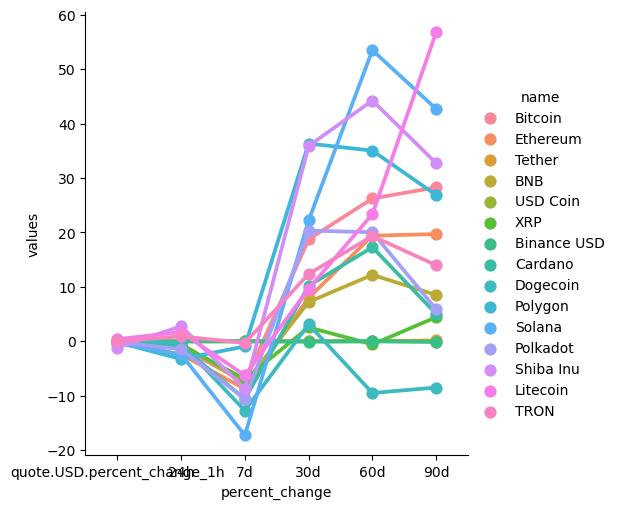

In [29]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [30]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,21659.73084,2023-02-11 02:05:20.017405
0,Bitcoin,21652.25625,2023-02-11 02:06:28.035818
0,Bitcoin,21650.73853,2023-02-11 02:07:29.002147
0,Bitcoin,21647.57600,2023-02-11 02:08:29.866466


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

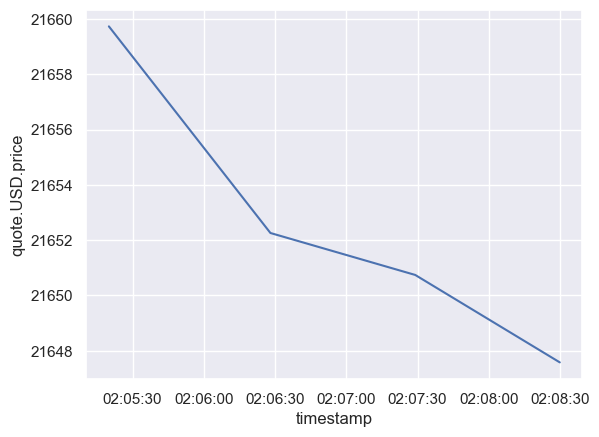

In [31]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)